In [14]:
import datetime
import spiceypy as spice
import numpy as np
import spicepy

# Load the SPICE kernels via a meta file
spice.furnsh("../kernels/naif0012.tls")
spice.furnsh("../kernels/de432s.bsp")
spice.furnsh("../kernels/pck00010.tpc")

In [15]:
init_time_utc = datetime.datetime(year=2000, month=1, day=1, 
                                  hour=0, minute=0, second=0)

delta_days = 10000
end_time_utc = init_time_utc + datetime.timedelta(days=delta_days)


In [16]:
init_time_utc_str = init_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
end_time_utc_str = end_time_utc.strftime("%Y-%m-%dT%H:%M:%S")

print(end_time_utc_str)
print(init_time_utc_str)

2027-05-19T00:00:00
2000-01-01T00:00:00


In [17]:
init_time_et = spiceypy.utc2et(init_time_utc_str)
end_time_et = spiceypy.utc2et(end_time_utc_str)

In [18]:
ssb_wrt_sun_position = []
time_interval_et = np.linspace(init_time_et,end_time_et,delta_days)
for time_interval_et_f in time_interval_et:
    _position, _ = spiceypy.spkgps(targ=0, et=time_interval_et_f, \
                                   ref='eclipj2000', obs=10)

    # Append the result to the final list
    ssb_wrt_sun_position.append(_position)

# Convert the list to a numpy array
ssb_wrt_sun_position = np.array(ssb_wrt_sun_position)

In [19]:
_, radii_sun = spiceypy.bodvcd(bodyid=10, item='RADII', maxn=3)

radius_sun = radii_sun[0]

# Scale the position values using the Sun's radius
ssb_wrt_sun_position_scaled = ssb_wrt_sun_position / radius_sun

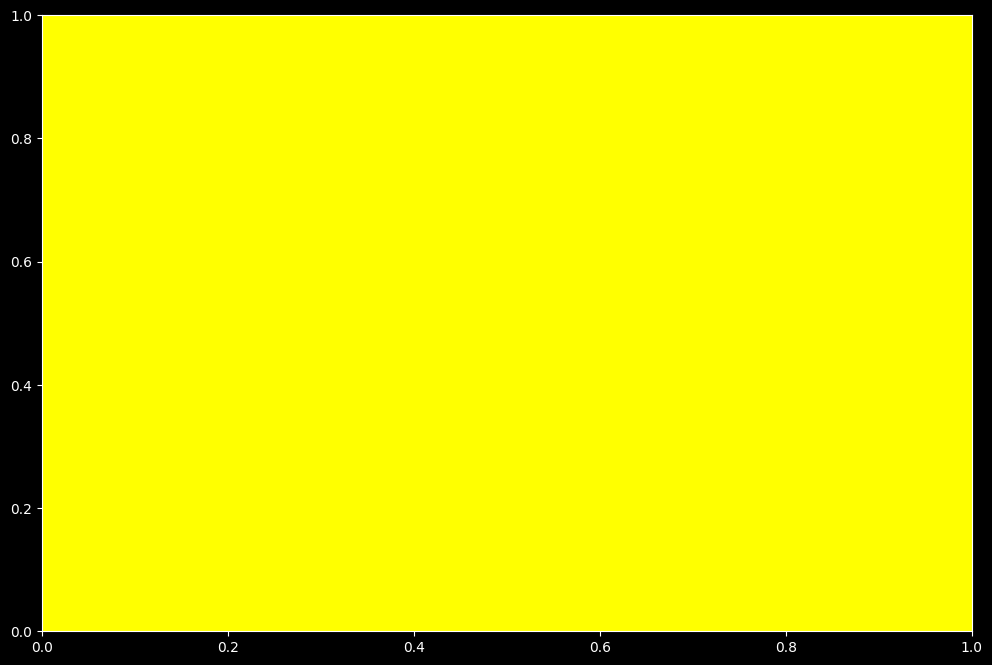

In [24]:
from matplotlib import pyplot as plt
ssb_wrt_sun_position_scaled_xy = ssb_wrt_sun_position_scaled[:,0:2]
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12,8))
sun_circ = plt.Circle((0.0,0.0,0.0),color="yellow",alpha=1)
ax.add_artist(sun_circ)

# Plot the SSB movement
ax.plot(ssb_wrt_sun_position_scaled_xy[:, 0], \
        ssb_wrt_sun_position_scaled_xy[:, 1], \
        ls='solid', color='royalblue')

# Set some parameters for the plot, set an equal ratio, set a grid, and set
# the x and y limits
ax.set_aspect('equal')
ax.grid(True, linestyle='dashed', alpha=0.5)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Some labelling
ax.set_xlabel('x in sun-radius')
ax.set_ylabel('y in sun-radius')

# Saving the figure in high quality.
plt.savefig('SSB_WRT_SUN.png', dpi=300)
